In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
data=pd.read_csv('clean_data.csv',index_col='date',parse_dates=True)
data.drop(data.iloc[:,0:2],axis=1,inplace=True)

In [40]:
data.head()

,eventid,iyear,imonth,iday,extended,provstate,city,latitude,longitude,specificity,...,weaptype1,weaptype1_txt,nkill,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
date,,,,,,,,,,,,,,,,,,,,,
1970-03-14,197003140002,1970,3,14,0,Alexandria,Alexandria,31.198056,29.919167,1.0,...,6,Explosives,0.0,1,0.0,PGIS,-9,-9,0,-9
1971-11-28,197111280001,1971,11,28,0,Cairo,Cairo,30.084629,31.334314,1.0,...,5,Firearms,1.0,0,0.0,PGIS,1,1,0,1
1972-02-19,197202190001,1972,2,19,0,Cairo,Cairo,30.084629,31.334314,1.0,...,6,Explosives,0.0,0,1.0,Hijacking DB,0,1,1,1
1977-12-05,197712050001,1977,12,5,0,Cairo,Cairo,30.084629,31.334314,1.0,...,5,Firearms,1.0,0,0.0,PGIS,-9,-9,1,1
1978-09-30,197809300002,1978,9,30,0,North Sinai,Yamit,31.275278,34.167778,1.0,...,6,Explosives,0.0,1,0.0,PGIS,1,0,1,1


--

Let's analyse the evolution of terrorism across time.


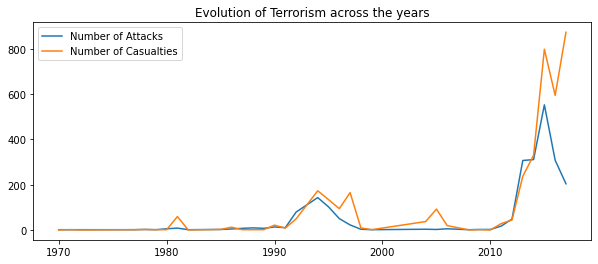

In [41]:
frequency_year=pd.DataFrame(data.iyear.value_counts()).sort_index().rename(mapper={'iyear':'attacks'},axis=1)
casualties_year=pd.DataFrame(data[['iyear','nkill']].groupby('iyear').agg('sum'))


plt.figure(figsize=(10,4))
plt.title('Evolution of Terrorism across the years')
plt.plot(frequency_year,label='Number of Attacks')
plt.plot(casualties_year,label='Number of Casualties')
plt.legend()

plt.show()


In [42]:
#We notice that the 1970s were relatively peaceful, and that terrorism began to become a serious threat in the 1990s.
#We notice that the 2010s have been the deadliest, which can be attributed to the fall of Mubarak and the rise of the Islamic State
#in neighboring Libya and in the Sahel.
#Althought the number of attacks started decreasing in the second half of the 2010s, the number of casualties kept increasing
#Inconsistant data or deadlier attacks? Let's find out!

In [43]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'provstate', 'city',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt', 'nkill',
       'property', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

In [44]:
#Let's check the attacks that took place after 2014 and the rise of ISIS
data['nkill'].mean()

1.6958855098389982

In [45]:
data.loc[data.iyear>=2014].sort_values(by='nkill',ascending=False)[['nkill','targsubtype1_txt']]

,nkill,targsubtype1_txt
date,,
2017-11-24,311.0,Place of Worship
2015-10-31,224.0,Aircraft (not at an airport)
2017-07-07,65.0,Military Barracks/Base/Headquarters/Checkpost
2014-10-24,34.0,Military Checkpoint
2016-01-14,34.0,Military Checkpoint
...,...,...
2015-04-14,0.0,"Police Building (headquarters, station, school)"
2015-04-08,0.0,Electricity
2015-04-16,0.0,Military Transportation/Vehicle (excluding con...


In [46]:
#Indeed, the Russian aircraft bombing or the mosque of 24th november 2017 were particularly deadly, way above the mean

In [47]:
#We can now wonder what types of attack are the deadliest

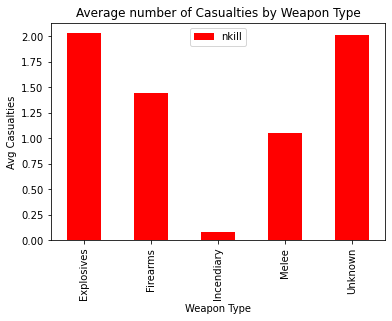

In [48]:
data[['weaptype1_txt','nkill']].groupby('weaptype1_txt').agg(np.mean).plot(kind='bar',color='red')
plt.title("Average number of Casualties by Weapon Type")
plt.xlabel('Weapon Type')
plt.ylabel('Avg Casualties')
plt.show()

In [49]:
#Unknown is just as deadly as explosives. Therefore the data quality prevents us from providing insights about this issue

Are some province states more targeted than others?

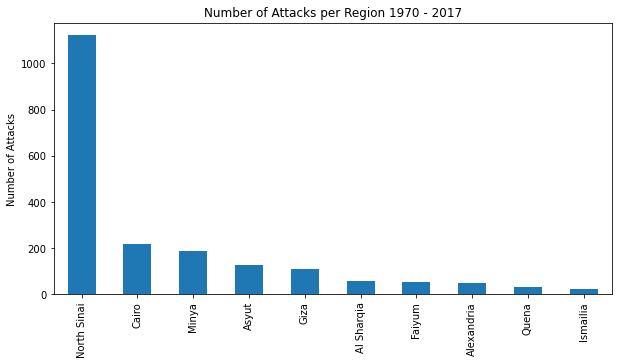

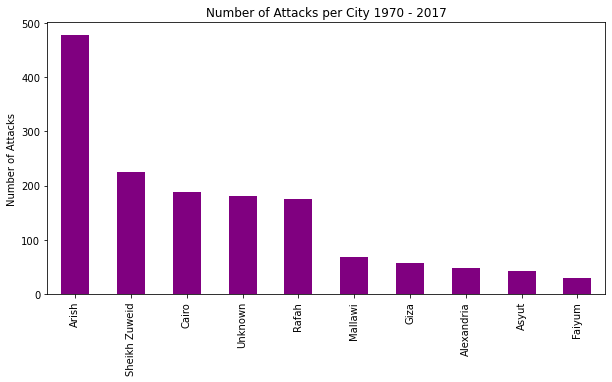

In [50]:
plt.figure(figsize=(10,5))
plt.title('Number of Attacks per Region 1970 - 2017')
plt.ylabel('Number of Attacks')
data.provstate.value_counts().head(10).plot(kind='bar')
plt.show()

plt.figure(figsize=(10,5))
plt.title('Number of Attacks per City 1970 - 2017')
plt.ylabel('Number of Attacks')
data.city.value_counts().head(10).plot(kind='bar',color='purple')
plt.show()

In [51]:
#We can see the number of attacks is mostly concentrated in North Sinai region. Desertic region so harder to control.
#The city of Arish in North Sinai is more targeted than others. Cairo region is less targeted than Sinai, but if we focus
#on Cairo city itself, we can deem the city as dangerous.
#There is still a high amount of unknown cities

In [52]:
data.loc[data.city=='Unknown']['provstate'].value_counts().head(5)

North Sinai    86
Al Sharqia     20
Unknown        13
Faiyum          9
Giza            6
Name: provstate, dtype: int64

In [53]:
#Still, we see that if we zero in on Unknown cities, the majority of them happens to be in the North Sinai region. 
#Cairo dangerousness is not underrated

In terms of casualties, which regions have been the deadliest?

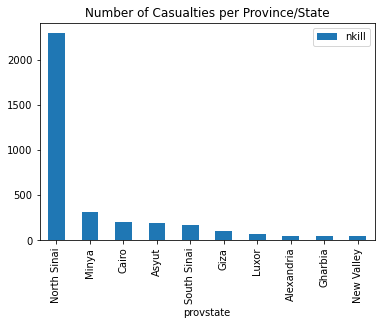

In [59]:

data[['provstate','nkill']].groupby('provstate').agg('sum').sort_values(by='nkill',ascending=False).head(10).plot(kind='bar')
#Unsurprisingly, the North Sinai region has been the deadliest
plt.title("Number of Casualties per Province/State")

plt.show()

Let's inquire about correlation between numerical data

<AxesSubplot:>

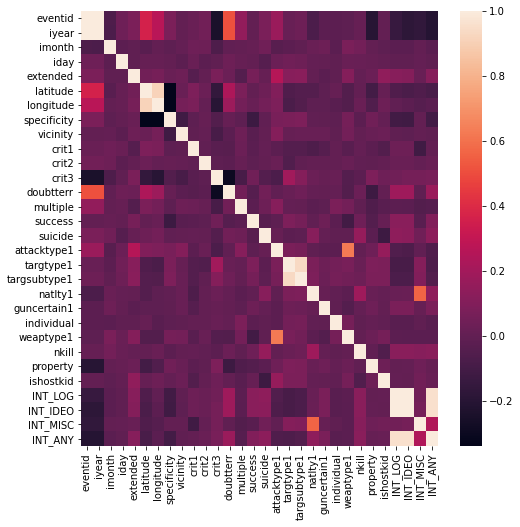

In [65]:
correlation=data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation)

In [ ]:
#We can't spot heavily correlated variables